In [1]:
# Paquetes importados para análisis preliminar
import numpy as np # manejo de matrices
import pandas as pd # importación de archivos de excel
import matplotlib.pyplot as plt # graficación
import os # acceso al sistema operativo

In [2]:
# Se importan librerías estadísticas y de graficación avanzada
import seaborn as sns # para graficación más compleja
import statsmodels.api as sm # para la evaluación del ajuste el modelo de ANOVA
from statsmodels.formula.api import ols # para la construcción del modelo de ANOVA

El presente cuaderno Jupyter busca estimar la repetibilidad y la precisión intermedia de las mediciones con la celda de Baucke para cada pH deseado.

In [3]:
def Lectura(file_dir,n):
    '''
    Función que recibe un directorio que contiene carpetas por cada día que se ejecutaron las mediciones y extrae los últimos datos del Potencial de los archivos Excel
    Input
    ----------------
    file_dir: el direcctorio en el cual se encuentran las capetas de cada día de medición.
    n: número de datos a extraer
    
    Output
    ----------------
    datos: un diccionario con los datos separados por día de medición.
    '''
    # utilizando os.listdir se hace una lista de los directorios que se encuentran en el directorio file_dir
    días=os.listdir(file_dir)
    # se define un diccionario para el almacenamiento de la información
    datos={}
    # se itera sobre la lista de directorios
    for iDía in días:
        archivos=os.listdir(os.path.join(file_dir,iDía)) # se hace una lista con los nombres de los archivos en el directorio
        potenciales= [] # {} # se crea una lista para el almacenamiento de los datos

        # rep0=None

        # Se inicia una iteración sobre los archivos que están en ese día
        for iArchivo in archivos:
            df=pd.read_excel(os.path.join(os.path.join(file_dir,iDía),iArchivo),skiprows=1,header=0,sheet_name="Datos_Crudos") # se realiza la lectura del archivo de excel
            potenciales.append(df['DELTA pH MRC'][-n:].values) # se añaden los últimos 300 datos del potencial a la lista que se creó anteriormente

        datos[iDía]=potenciales # se crea una entrada con el Día como llave en el diccionario creado al inicio.
    return datos

In [4]:
def Graficación(datos):
    '''
    Función que realiza gráficas de caja y bigotes por día de medición.
    Input
    ------------
    datos: diccionario que viene dado de la forma que entrega la función Lectura.
    
    Output:
    ------------
    gráficas de cada día de medición
    '''
    for iKey in datos.keys(): # se itera por el número de días
        día=datos[iKey] # se toma el día
        plt.figure(figsize=(15,10)) # tamaño de la figura
        plt.xlabel("Corrida") # nombre del eje x
        plt.ylabel(r"$\Delta$pH") # nombre del eje y
        plt.boxplot(np.array(día).T) # graficación de los datos
        plt.plot(np.linspace(0,len(np.array(día))+1,len(np.array(día).T)),np.zeros(len(np.array(día).T)),color="blue") # 
        plt.plot(np.linspace(0,len(np.array(día))+1,len(np.array(día).T)),np.zeros(len(np.array(día).T))+0.001,color="orange")
        plt.plot(np.linspace(0,len(np.array(día))+1,len(np.array(día).T)),np.zeros(len(np.array(día).T))+-0.001,color="orange")
        plt.plot(np.linspace(0,len(np.array(día))+1,len(np.array(día).T)),np.zeros(len(np.array(día).T))+0.004,color="red")
        plt.plot(np.linspace(0,len(np.array(día))+1,len(np.array(día).T)),np.zeros(len(np.array(día).T))+-0.004,color="red")
        plt.title(iKey)
        plt.show()

# pH 4

In [5]:
# Se define el directorio en que se encuentran los datos
file_dir=r"Datos\Vida útil de electrodos\Sigma Aldrich"

In [6]:
# se realiza la lectura
datoss=Lectura(file_dir,600)

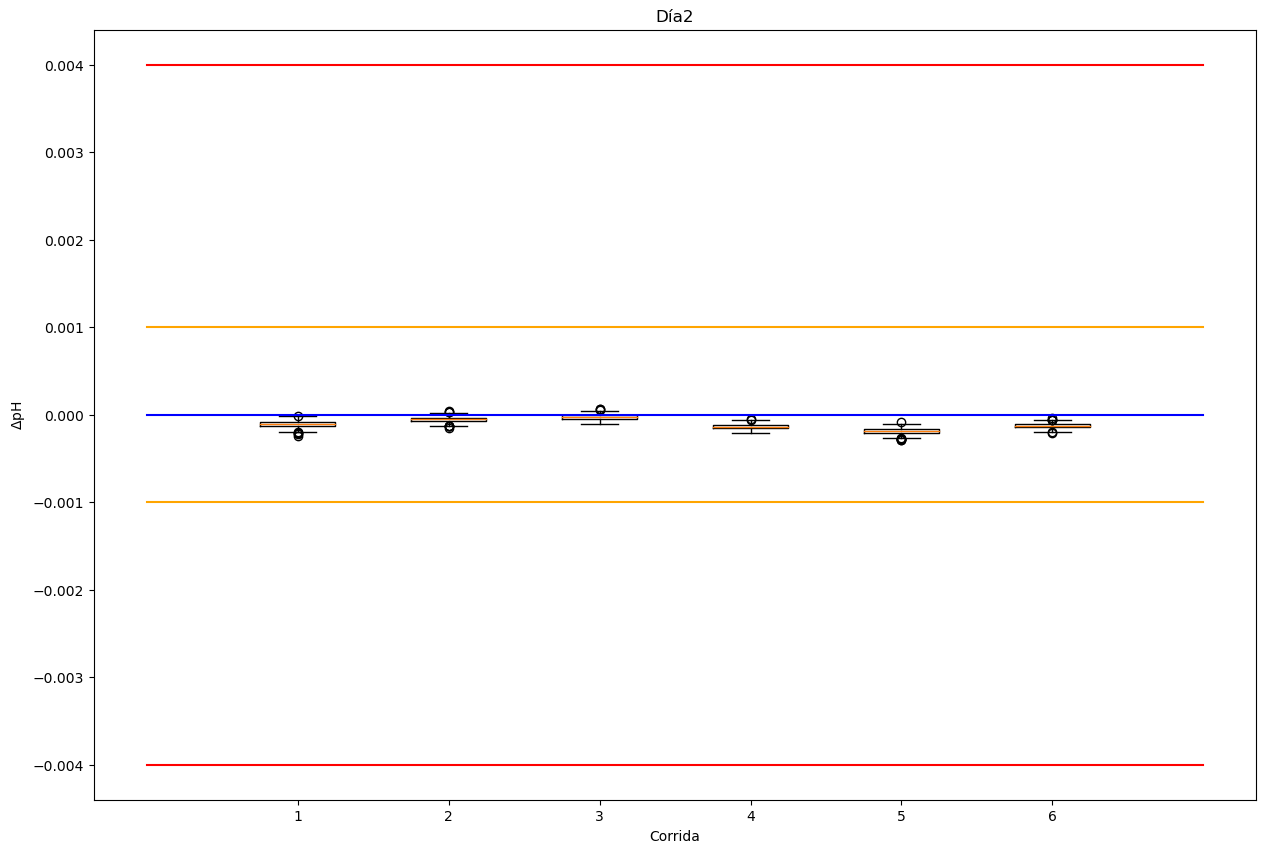

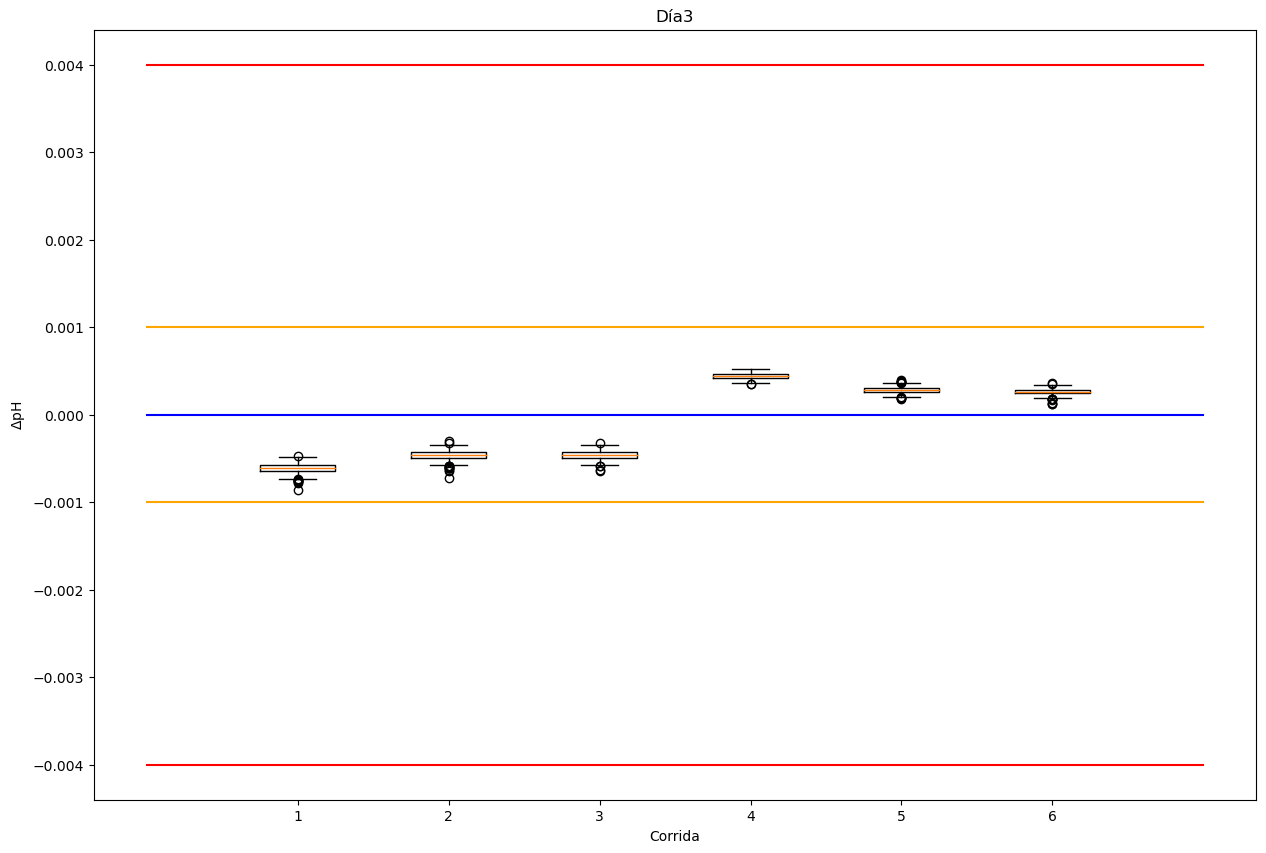

In [7]:
Graficación(datoss)

In [8]:
día=["Día1","Día2","Día3"]
prueba=["1","2"]
corrida=["1","2","3"]
diseño=[(x,y,z) for x in día for y in prueba for z in corrida]
exp_df = pd.DataFrame(diseño,columns=['Día',"Prueba",'Corrida'])

In [9]:
# Se asignan las medias del potencial de cada corrida al respectivo ensayo
n=0 # contador de iteraciones totales, funciona para definir la posición del valor en el Datafram
for iDía in datoss.keys(): # se itera por día
    día=datoss[iDía] 
    for iCorrida in range(len(día)): # se itera por corrida en un día
        exp_df.at[n,"dpH"]=día[iCorrida].mean() # se agrega en la columna Potencial Medio (V) el valor de la media
        n+=1 # se suma 1 al contador

In [10]:
exp_df

Día Prueba Corrida       dpH
0   Día1      1       1 -0.000099
1   Día1      1       2 -0.000333
2   Día1      1       3 -0.000193
3   Día1      2       1 -0.000001
4   Día1      2       2 -0.000195
5   Día1      2       3 -0.000209
6   Día2      1       1 -0.000104
7   Día2      1       2 -0.000053
8   Día2      1       3 -0.000028
9   Día2      2       1 -0.000134
10  Día2      2       2 -0.000185
11  Día2      2       3 -0.000128
12  Día3      1       1 -0.000611
13  Día3      1       2 -0.000464
14  Día3      1       3 -0.000463
15  Día3      2       1  0.000441
16  Día3      2       2  0.000282
17  Día3      2       3  0.000262

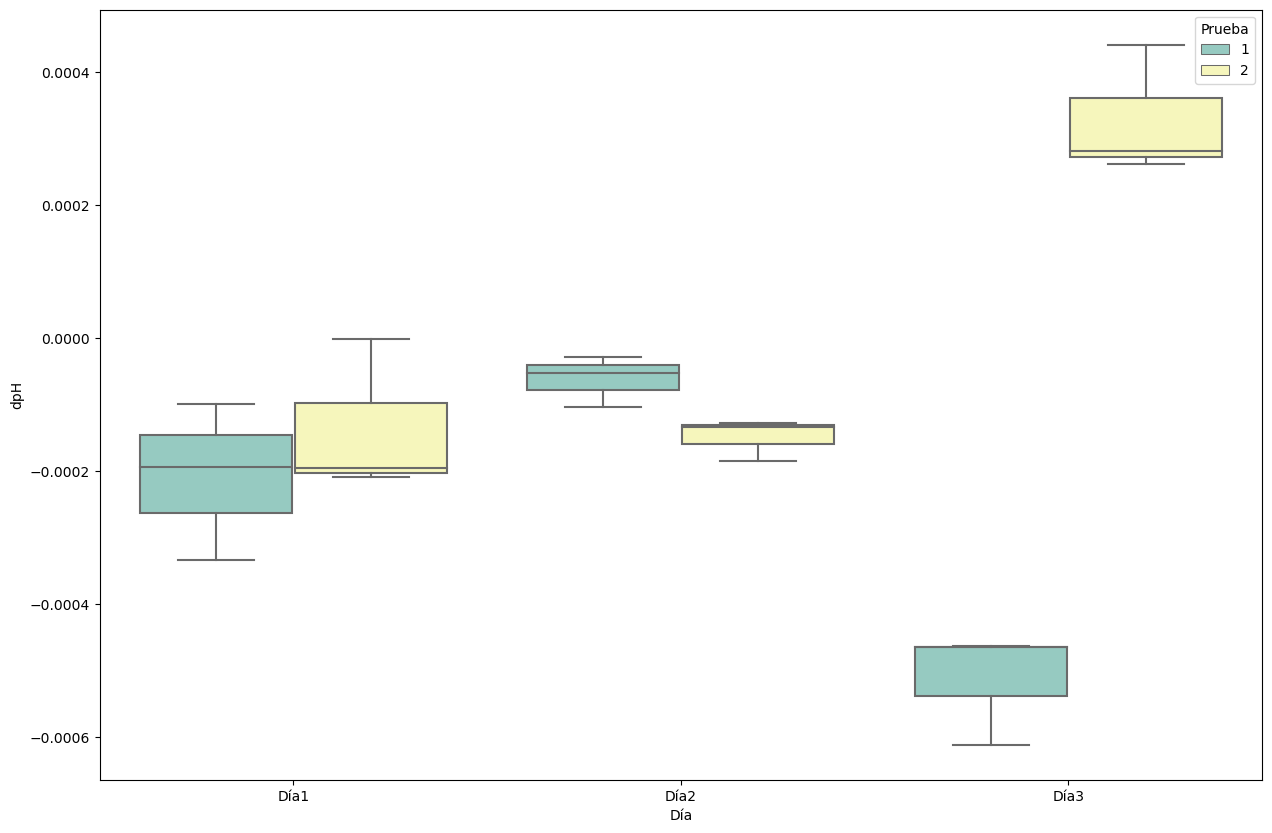

In [11]:
# Se realiza la gráfica de caja y bigotes para comparar la forma en la que se comportan las pruebas por día de uso
plt.figure(figsize=(15,10))
sns.boxplot(x="Día", y="dpH", hue="Prueba", data=exp_df, palette="Set3") 
plt.show()

In [12]:
# Se realiza el ANOVA
model = ols('dpH ~ C(Día)+C(Corrida) + C(Prueba)', data=exp_df).fit() # modelo reducido
anova_table = sm.stats.anova_lm(model, typ=2) # tabla ANOVA
anova_table

sum_sq    df         F    PR(>F)
C(Día)      2.173789e-08   2.0  0.159949  0.853974
C(Corrida)  1.627380e-08   2.0  0.119744  0.888194
C(Prueba)   3.415614e-07   1.0  5.026484  0.044637
Residual    8.154282e-07  12.0       NaN       NaN

Se observa que las principales variaciones en los $\Delta\textrm{pH}$ para pH 4 se presentan entre pruebas de un mismo día. Esta repetibilidad es aún así despreciable de acuerdo con los parámetros de mérito y sería no significativo su aport dentro de la incertidumbre de la medición. A pesar de que el ANOVA no lo muestra, visualmente se observa variabilidad entre días, por lo que para un proceso de certificación no deja de ser recomendable tomar todas las mediciones en el mismo día.

## Repetibilidad

In [13]:
(4.006+exp_df[exp_df.Día=="Día1"].dpH).std()/np.abs(4.006+exp_df[exp_df.Día=="Día1"].dpH).mean()*100

0.002798206361409966

In [14]:
(4.006+exp_df[exp_df.Día=="Día2"].dpH).std()/np.abs(4.006+exp_df[exp_df.Día=="Día2"].dpH).mean()*100

0.001431106072674526

In [15]:
(4.006+exp_df[exp_df.Día=="Día3"].dpH).std()/np.abs(4.006+exp_df[exp_df.Día=="Día3"].dpH).mean()*100

0.011676813347300264

## Precisión Intermedia

In [16]:
(4.006+exp_df.dpH.values).std()/(4.006+exp_df.dpH.values).mean()*100

0.006432063529875519

# pH 9

In [17]:
# Se define el directorio en que se encuentran los datos
file_dir=r"Datos\Repetibilidad\pH9"

In [18]:
# se realiza la lectura
datosj=Lectura(file_dir,600)

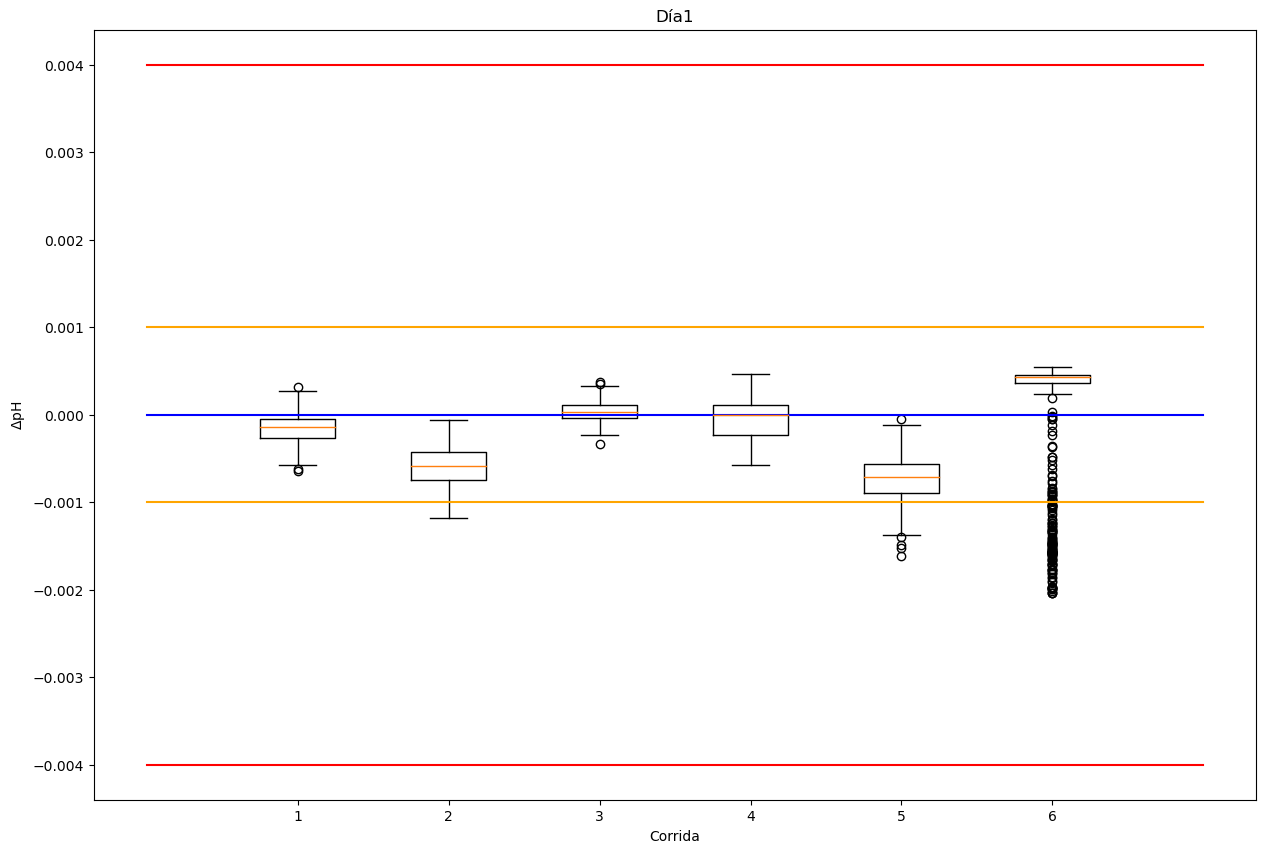

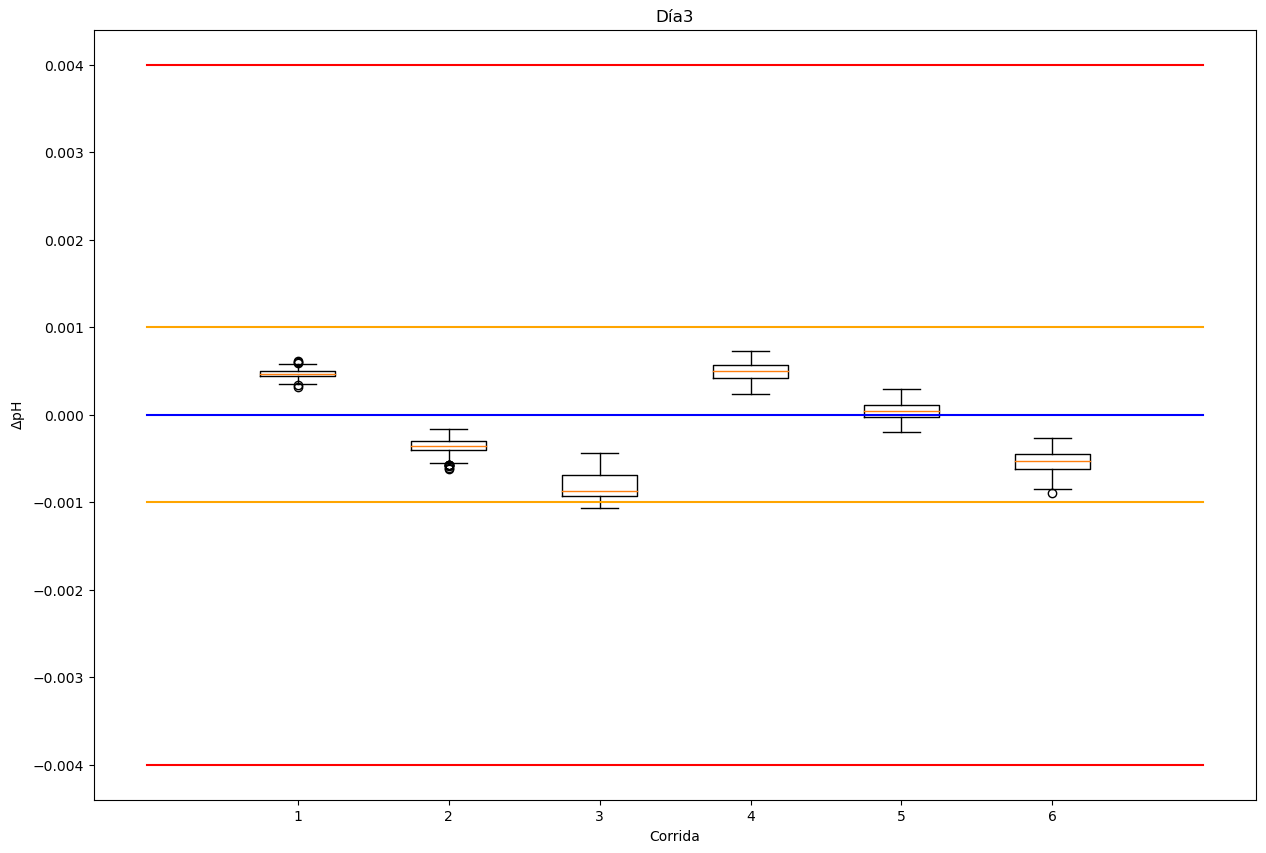

In [19]:
Graficación(datosj)

In [20]:
día=["Día1","Día2","Día3","Día4"]
prueba=["1","2"]
corrida=["1","2","3"]
diseño=[(x,y,z) for x in día for y in prueba for z in corrida]
exp_df = pd.DataFrame(diseño,columns=['Día',"Prueba",'Corrida'])

In [21]:
# Se asignan las medias del potencial de cada corrida al respectivo ensayo
n=0 # contador de iteraciones totales, funciona para definir la posición del valor en el Datafram
for iDía in datosj.keys(): # se itera por día
    día=datosj[iDía] 
    for iCorrida in range(len(día)): # se itera por corrida en un día
        exp_df.at[n,"dpH"]=día[iCorrida].mean() # se agrega en la columna Potencial Medio (V) el valor de la media
        n+=1 # se suma 1 al contador

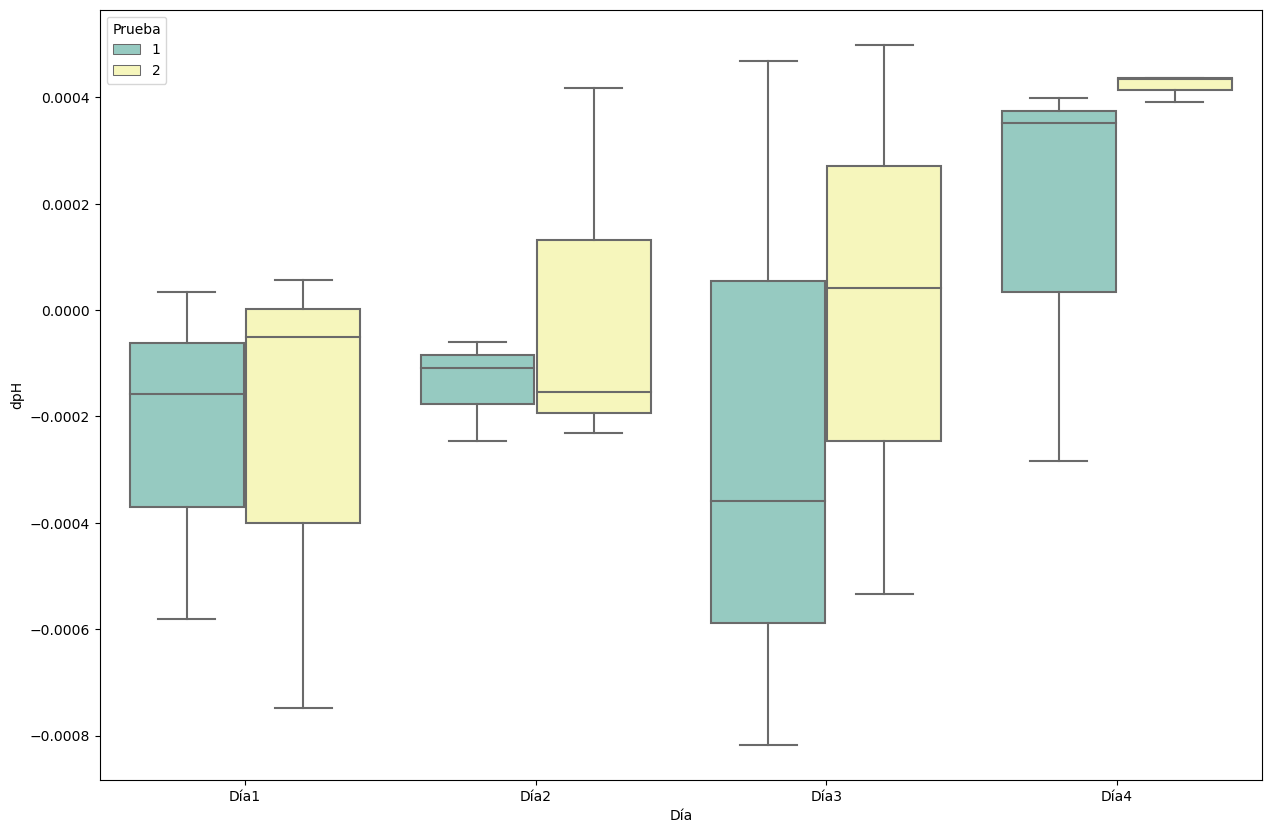

In [22]:
# Se realiza la gráfica de caja y bigotes para comparar la forma en la que se comportan las pruebas por día de uso
plt.figure(figsize=(15,10))
sns.boxplot(x="Día", y="dpH", hue="Prueba", data=exp_df, palette="Set3") 
plt.show()

In [23]:
# Se realiza el ANOVA
model = ols('dpH ~ C(Día)+C(Corrida) + C(Prueba)', data=exp_df).fit() # modelo reducido
anova_table = sm.stats.anova_lm(model, typ=1) # tabla ANOVA
anova_table

df        sum_sq       mean_sq         F    PR(>F)
C(Día)       3.0  9.275459e-07  3.091820e-07  2.439895  0.099768
C(Corrida)   2.0  4.431996e-07  2.215998e-07  1.748745  0.203873
C(Prueba)    1.0  1.535431e-07  1.535431e-07  1.211678  0.286343
Residual    17.0  2.154229e-06  1.267194e-07       NaN       NaN

Se observa que las principales variaciones en los $\Delta\textrm{pH}$ para pH 4 se presentan entre Días. Esto indica que las certificaciones deberán realizarse en un mismo día para evitar la variabilidad que se produce en el MR. La desviación estándar por repetibilidad correspondería a la proveniente del Factor Prueba y Corrida, mientras que la de precisión intermedia a la que se obtiene de Día y sus interacciones.

## Repetibilidad

In [24]:
(9.20+exp_df[exp_df.Día=="Día1"].dpH).std()/np.abs(9.20+exp_df[exp_df.Día=="Día1"].dpH).mean()*100

0.0037025207809648427

In [25]:
(9.20+exp_df[exp_df.Día=="Día2"].dpH).std()/np.abs(9.20+exp_df[exp_df.Día=="Día2"].dpH).mean()*100

0.002672945174878866

In [26]:
(9.20+exp_df[exp_df.Día=="Día3"].dpH).std()/(9.20+exp_df[exp_df.Día=="Día3"].dpH).mean()*100

0.005894286889357829

In [27]:
(9.20+exp_df[exp_df.Día=="Día4"].dpH).std()/(9.20+exp_df[exp_df.Día=="Día4"].dpH).mean()*100

0.003067451041083996

## Precisión Intermedia

In [28]:
(9.20+exp_df.dpH.values).std()/(9.20+exp_df.dpH.values).mean()*100

0.0042554407967373455

# pH 7

In [29]:
# Se define el directorio en que se encuentran los datos
file_dir=r"Datos\Repetibilidad\pH7"
# se realiza la lectura
datos7=Lectura(file_dir,600)

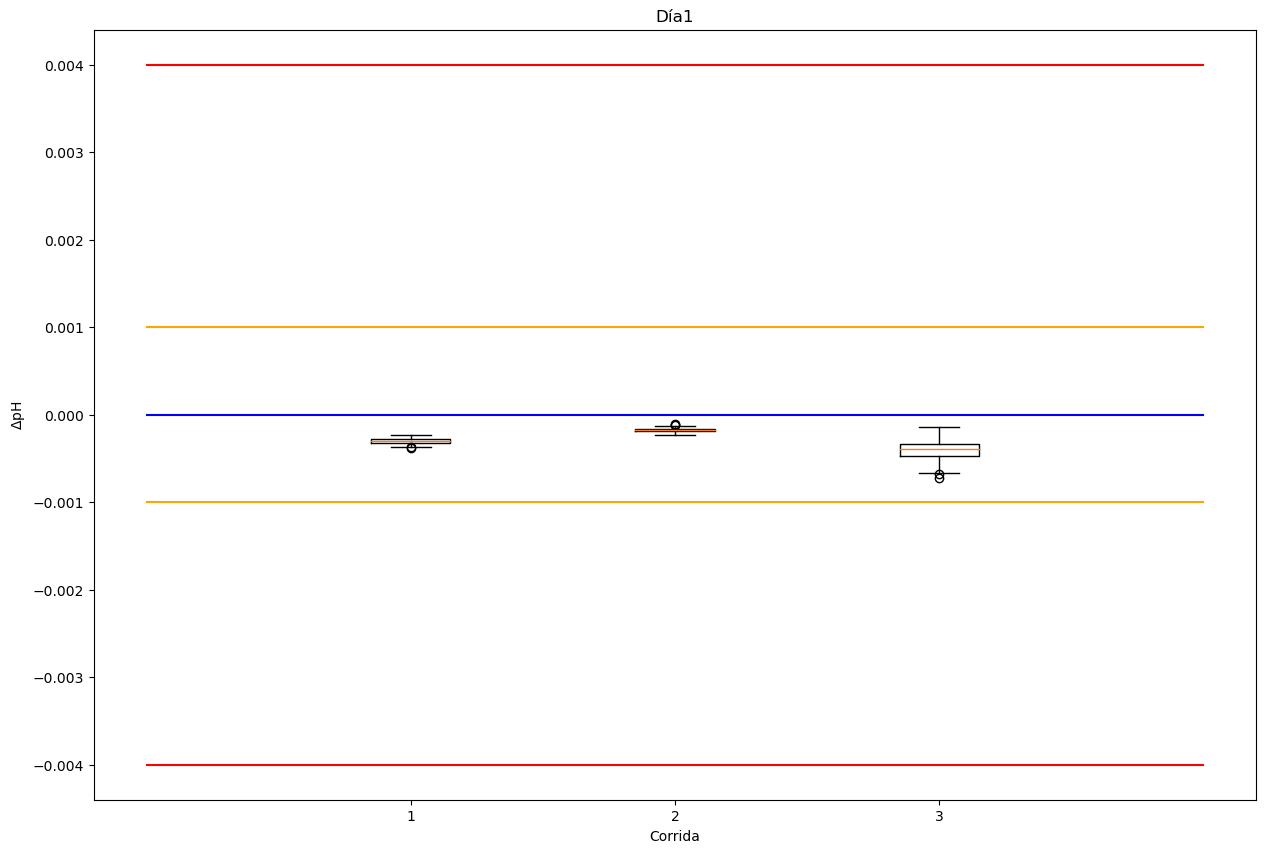

In [30]:
Graficación(datos7)

In [31]:
día=["Día1","Día2"]
corrida=["1","2","3"]
diseño=[(x,y) for x in día for y in corrida]
exp_df = pd.DataFrame(diseño,columns=['Día','Corrida'])

In [32]:
# Se asignan las medias del potencial de cada corrida al respectivo ensayo
n=0 # contador de iteraciones totales, funciona para definir la posición del valor en el Datafram
for iDía in datosj.keys(): # se itera por día
    día=datosj[iDía] 
    for iCorrida in range(len(día)): # se itera por corrida en un día
        exp_df.at[n,"dpH"]=día[iCorrida].mean() # se agrega en la columna Potencial Medio (V) el valor de la media
        n+=1 # se suma 1 al contador

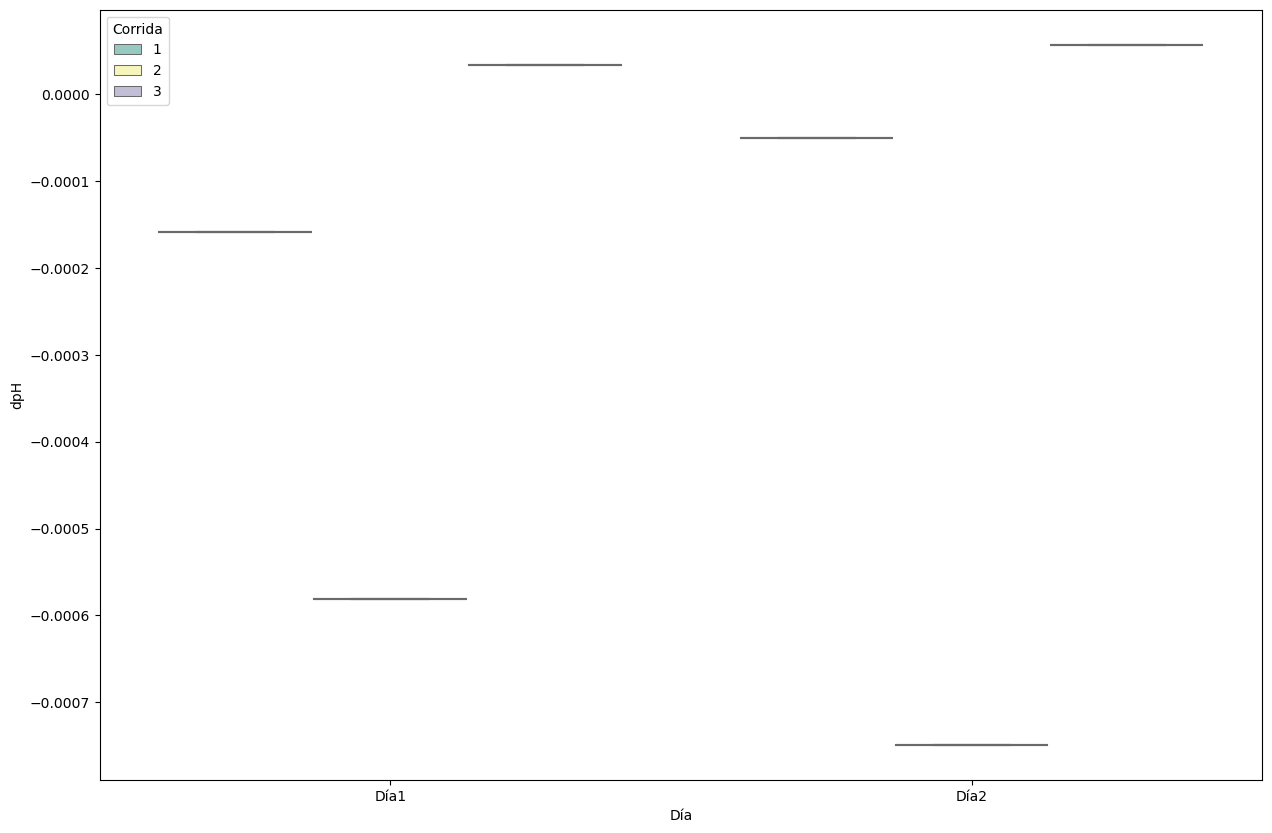

In [33]:
# Se realiza la gráfica de caja y bigotes para comparar la forma en la que se comportan las pruebas por día de uso
plt.figure(figsize=(15,10))
sns.boxplot(x="Día", y="dpH", hue="Corrida", data=exp_df, palette="Set3") 
plt.show()

In [34]:
# Se realiza el ANOVA
model = ols('dpH ~ C(Día)+C(Corrida)', data=exp_df).fit() # modelo reducido
anova_table = sm.stats.anova_lm(model, typ=1) # tabla ANOVA
anova_table

df        sum_sq       mean_sq          F    PR(>F)
C(Día)      1.0  2.314016e-10  2.314016e-10   0.023209  0.892896
C(Corrida)  2.0  5.599479e-07  2.799740e-07  28.080650  0.034387
Residual    2.0  1.994070e-08  9.970352e-09        NaN       NaN

## Repetibilidad

In [35]:
(6.86+exp_df[exp_df.Día=="Día1"].dpH).std()/np.abs(6.86+exp_df[exp_df.Día=="Día1"].dpH).mean()*100

0.00458072534479504

In [36]:
(6.86+exp_df[exp_df.Día=="Día2"].dpH).std()/np.abs(6.86+exp_df[exp_df.Día=="Día2"].dpH).mean()*100

0.006374439578646835

## Precisión Intermedia

In [37]:
(6.86+exp_df.dpH.values).std()/(6.86+exp_df.dpH.values).mean()*100

0.0057070122456449905